Scikit-Learn (sklearn) will help you make machine learning models. A machine Learning library

Why Scikit-Learn?

- Built on Numpy and Matplotlib (and Python)
- Has many in-built machine learning models
- Methods to evaluate your machine learning models
- Very well-designed API

You do not need to learn the math for machine learning models. Scikit-Learn helps keep away from that. 

What are we going to cover

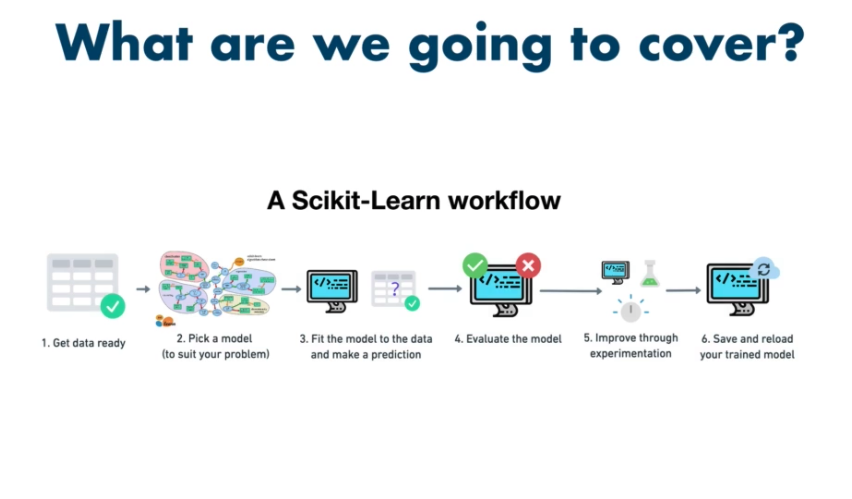

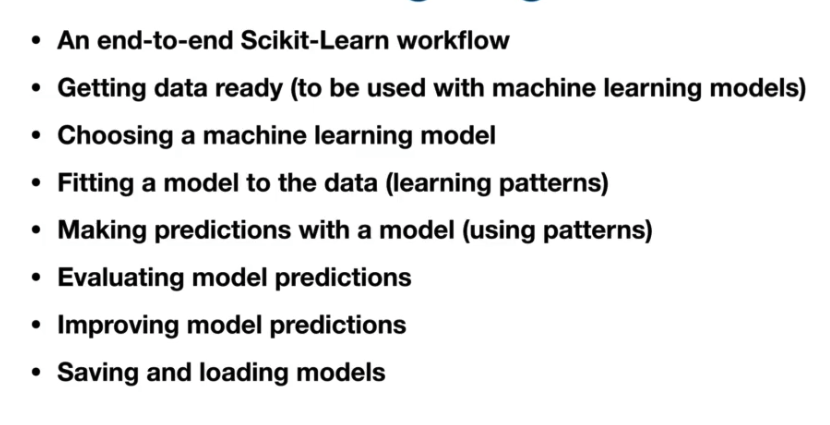

# 0. Standard library imports

For all machine learning projects, you will often see these libraries (Matplotlib , numpy, and pandas) imported at the top. 

In [10]:
# 1. Get the data ready 

import numpy as np
import pandas as pd
%matplotlib inline
import pandas as pd

We'll use 2 datasets for demonstration purposes
- heart_disease

In [11]:
#Classification Data
heart_disease = pd.read_csv("heart-disease.csv")

In [12]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
#Create X (features matrix)
X = heart_disease.drop("target", axis = 1)

#Create Y (labels)
y = heart_disease["target"]

In [14]:
#2. Choose the right model and hyperparameters

# for this we are going with a classification model 

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)


# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
# 3. Fit the model to the training data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
clf.fit(X_train, y_train);

In [17]:
# Make a prediction
y_label = clf.predict(np.array([[0,2,3,4]]))

ValueError: X has 4 features, but DecisionTreeClassifier is expecting 13 features as input.

In [18]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [19]:
# 4 . Evaluate the model 
clf.score(X_train, y_train)

1.0

In [20]:
clf.score(X_test, y_test)

0.7704918032786885

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.80      0.80      0.80        35

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [22]:
confusion_matrix(y_test, y_preds)

array([[19,  7],
       [ 7, 28]])

In [23]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [24]:
# 5. Improve a model 
#Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accurary on test set : {clf.score(X_test, y_test) * 100}%")
    print("")

Trying model with 10 estimators...
Model accurary on test set : 78.68852459016394%

Trying model with 20 estimators...
Model accurary on test set : 77.04918032786885%

Trying model with 30 estimators...
Model accurary on test set : 80.32786885245902%

Trying model with 40 estimators...
Model accurary on test set : 77.04918032786885%

Trying model with 50 estimators...
Model accurary on test set : 78.68852459016394%

Trying model with 60 estimators...
Model accurary on test set : 75.40983606557377%

Trying model with 70 estimators...
Model accurary on test set : 75.40983606557377%

Trying model with 80 estimators...
Model accurary on test set : 77.04918032786885%

Trying model with 90 estimators...
Model accurary on test set : 80.32786885245902%



In [25]:
# 6. Save a model and load it 
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [26]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

In [27]:
#Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with Machine Learning 

Three main things we have to do:

    1. Split the data into features and labels (usually 'X' and 'y')
    2. Filling (also called inputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [28]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [29]:
# Splitting the data 

#Features
X = heart_disease.drop("target", axis = 1)

#Labels
y = heart_disease["target"]

In [30]:
# We need to split data into training and test sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [32]:
# ((data, columns))

In [33]:
X.shape

(303, 13)

# Data Science Quick tips

THINGS WE NEED TO DO FOR THIS CHAPTER

Clean Data -> Transform Data -> Reduce Data 


Clean Data 
- we need to remove and replace data
- sometimes data is missing
- there can be outliers

Transform Data 
- convert information to numbers 
- price of a house need to be changed to numbers 
- hard to know what a color is. Convert a color to RGB color
- use 0 and 1 for boolean


Reduce Data 
- More data costs money 
- more data costs energy 
- try to get the same result with the same data 
- remove some columns that seem irrelevant 

# Getting Your Data Ready: Convert Data to Numbers

In [34]:
# 1.1 make sure it's all numerical 

In [35]:
import pandas as pd

In [36]:
car_sales = pd.read_csv("car-sales-extended.csv")

In [37]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [38]:
# Split into x / y 

X = car_sales.drop("Price", axis = 1) # Feature matrix
y = car_sales["Price"] # Label 


#Split int training and test test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
# Buuld machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
mode.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [40]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [41]:
# turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] #sometimes you need to treat data with numbers, categorical .
# For example, if a column has numbers, it could be qualitative
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

# Learn About One Hot Encoding 
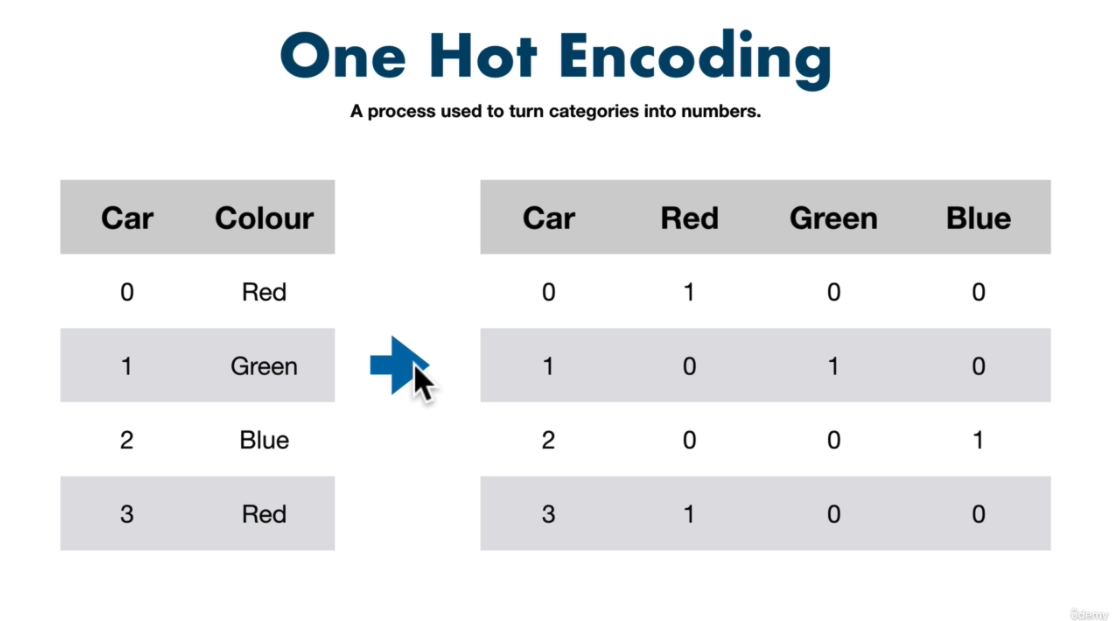


In [43]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [33]:
# Let's refit the model 
import numpy as np
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
model.score(X_test, y_test)

0.3235867221569877

# 1.2 What if there were missing values? 

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether. 


In [35]:
# Import car sales missing data 
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
#Shows sum of missing data in each column 


car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
#Create X and y 

X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

## Option 1: Fill missing data with Pandas 


In [47]:
# Fill the "Make" column 
car_sales_missing["Make"].fillna("missing", inplace = True)

#Fill the Colour column 
car_sales_missing["Colour"].fillna("missing", inplace = True)

#Fill the Odometer column 
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

#Fill the Doors column 
car_sales_missing["Doors"].fillna(4, inplace = True)

In [48]:
# remove rows with missing Price value
car_sales_missing.dropna(inplace = True)

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [51]:
#Let's try and convert our data to numbers

# turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] #sometimes you need to treat data with numbers, categorical 
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

## 2. Choosing the right estimator/algorithm for your problem 


Some things to note: 
    
    * Sklearn refers to machine learning models, algorithms as estimators
    * Classification problem - prediction a category (heart disease or not)
            * Sometimes you will see clf (short for classifier) used as a classification estimator
    * Regression problem - predicting a number (selling price of a car)
    
If you are working on a machine learning pro

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html